In [1]:
import numpy as np

In [3]:
from sklearn import datasets

In [5]:
iris=datasets.load_iris()

In [9]:
X=iris.data[:,[2,3]]

In [15]:
y=iris.target

In [17]:
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
#divide data to training data and test data.

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1, stratify=y)

In [22]:
print('Labels counts in y:', np.bincount(y))

Labels counts in y: [50 50 50]


In [23]:
print('Labels counts in y_train:', np.bincount(y_train))

Labels counts in y_train: [35 35 35]


In [24]:
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y_test: [15 15 15]


# スケーリング

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc=StandardScaler()

In [27]:
#Calculate a average of training data and 標準偏差
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
#Standardlized using avarage and 標準偏差
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [32]:
from sklearn.linear_model import Perceptron

In [35]:
ppn=Perceptron(n_iter=40, eta0=0.1, random_state=1)

In [37]:
ppn.fit(X_train_std,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [38]:
y_pred=ppn.predict(X_test_std)

In [39]:
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 3


In [43]:
#正解率
correct=1-(3/45)
print(Correct)

0.9333333333333333


In [44]:
from sklearn.metrics import accuracy_score

In [51]:
print('Accuracy: %.2f' % ppn.score(X_test_std, y_test))

Accuracy: 0.93


In [73]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    #マーカーとカラーマップの準備
    markers=('s', 'x', 'o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    #決定領域のプロット
    x1_min, x1_max = X[:, 0].min()-1,X[:,0].max()+1
    x2_min, x2_max = X[:, 0].min()-1,X[:,1].max()+1
    #グリッドポイントの作成
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    #1次元配列に変換して予測を実行
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl, 1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolor='black')
    if test_idx:
        X_test,y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')
    

In [74]:
X_combined_std=np.vstack((X_train_std, X_test_std))
y_combined=np.hstack((y_train,y_test))

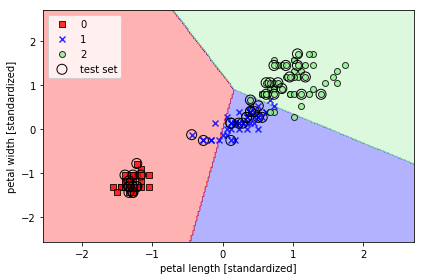

In [80]:
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>